# Reading data into python

The data you will analyze in this course will be provided in CSV format. The easiest way to read csv data into Python is via the [pandas Library](https://pandas.pydata.org/). Pandas provides conveinent data structures to manipulate and analyze data. Consider taking a look at the [10 minute intro to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).

## Reading data into python with pandas

The first step to using pandas in your script is to import it.

In [1]:
import pandas as pd

Next the read_csv(path_to_file) can be used to automatically read and parse your csv. The only required arguement is the path to the csv file as a string or path object. The file can be hosted locally on your computer or online. Documentation for this method can be found [here](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.read_csv.html).

In this example we'll use the boards thickness dataset we talked about in class.

In [2]:
# In this case we'll use the board thickness example
all_boards = pd.read_csv("https://openmv.net/file/six-point-board-thickness.csv")
print(all_boards)

                Date.Time  Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
0     2010-02-18 03:04:46  1761  1739  1758  1677  1684  1692
1     2010-02-18 03:37:01  1801  1688  1753  1741  1692  1675
2     2010-02-18 03:37:01  1697  1682  1663  1671  1685  1651
3     2010-02-18 03:37:01  1679  1712  1672  1703  1683  1674
4     2010-02-18 03:37:10  1699  1688  1699  1678  1688  1705
...                   ...   ...   ...   ...   ...   ...   ...
4995  2010-02-18 13:15:54  1690  1701  1690  1694  1735  1695
4996  2010-02-18 13:15:54  1703  1674  1666  1694  1659  1728
4997  2010-02-18 13:16:02  1657  1667  1675  1654  1648  1609
4998  2010-02-18 13:16:02  1746  1717  1638  1723  1703  1706
4999  2010-02-18 13:16:02  1668  1680  1668  1669  1651  1629

[5000 rows x 7 columns]


The read_csv method imports the csv data as a pandas dataframe. The dataframe provides convenient built in ways to query the data, manipulate the data, and analyze the data. 

Like the data, the dataframe in this case has 5000 rows and 7 columns. The column names can be found with the .columns property

In [3]:
print(all_boards.columns)

Index(['Date.Time', 'Pos1', 'Pos2', 'Pos3', 'Pos4', 'Pos5', 'Pos6'], dtype='object')


## Accessing elements and manipulating data

In this case, we're only interested in the board positions. The time the measurements were taken don't matter to us so we can drop that column (Date.Time) from the dataframe using the [.drop() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html). Note that all of these data manipulation operators return another dataframe object so the same methods are applicable to the transformed data as well.

In [4]:
boards_no_time = all_boards.drop(columns=["Date.Time"])
print(boards_no_time)

      Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
0     1761  1739  1758  1677  1684  1692
1     1801  1688  1753  1741  1692  1675
2     1697  1682  1663  1671  1685  1651
3     1679  1712  1672  1703  1683  1674
4     1699  1688  1699  1678  1688  1705
...    ...   ...   ...   ...   ...   ...
4995  1690  1701  1690  1694  1735  1695
4996  1703  1674  1666  1694  1659  1728
4997  1657  1667  1675  1654  1648  1609
4998  1746  1717  1638  1723  1703  1706
4999  1668  1680  1668  1669  1651  1629

[5000 rows x 6 columns]


Columns can be access by using their name in square brackers \[\] while rows can be access using their row (index) number and the [.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) property. iloc works similar to indexing on a list, the same type of slicing can be used \[start:end\].

In [5]:
pos1 = boards_no_time['Pos1']
print(pos1)

0       1761
1       1801
2       1697
3       1679
4       1699
        ... 
4995    1690
4996    1703
4997    1657
4998    1746
4999    1668
Name: Pos1, Length: 5000, dtype: int64


In [6]:
# Get the first three rows of the dataframe
first_three_rows = boards_no_time.iloc[0:3]
print(first_three_rows)

   Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
0  1761  1739  1758  1677  1684  1692
1  1801  1688  1753  1741  1692  1675
2  1697  1682  1663  1671  1685  1651


You can use the .head() or .tail() methods to get a certain amount of elements from the top (head) or bottom (tail) of the dataframe. Syntactically they're the same, so I'll only show an example of one

In [7]:
# Get the first three rows of pos 1 using head
first_three_rows = boards_no_time.head(3)
print(first_three_rows)

   Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
0  1761  1739  1758  1677  1684  1692
1  1801  1688  1753  1741  1692  1675
2  1697  1682  1663  1671  1685  1651


Row and column access can also be combined together. The head and tail methods would work here as well.

In [8]:
first_column_three_rows = boards_no_time['Pos1'].iloc[0:3]
print(first_column_three_rows)

0    1761
1    1801
2    1697
Name: Pos1, dtype: int64


It is also possible to filter the dataframe based on the value in certain columns. Filtering the values returns a new dataframe with just the values that meet the condition (using the [.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) property). 

In [9]:
# Get all columns (the whole dataframe) rows which have pos1 < 1650
less_1650 = boards_no_time.loc[boards_no_time['Pos1'] < 1650]
print(less_1650)

      Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
10    1546  1697  1654  1688  1668  1703
11    1524  1668  1594  1686  1741  1730
23    1608  1664  1641  1651  1633  1594
48    1636  1650  1649  1666  1673  1665
55    1643  1649  1624  1667  1662  1660
...    ...   ...   ...   ...   ...   ...
4932  1632  1608  1634  1667  1674  1706
4933  1619  1692  1696  1711  1742  1728
4961  1622  1627  1641  1664  1663  1660
4969  1645  1680  1658  1747  1793  1808
4974  1648  1612  1620  1637  1611  1694

[539 rows x 6 columns]


In [10]:
# Get only pos1 values for rows with pos1 < 1650
pos1_less_1650 = boards_no_time.loc[boards_no_time['Pos1'] < 1650, ['Pos1']]
print(pos1_less_1650)

      Pos1
10    1546
11    1524
23    1608
48    1636
55    1643
...    ...
4932  1632
4933  1619
4961  1622
4969  1645
4974  1648

[539 rows x 1 columns]


Separate conditionals can be combined using boolean logic. In this case each conditional needs to be written in round brackets and the symbols change slightly. The element-wise logical symbols for use in these statements are:
* and: &
* or: |
* not: ~ 

In [11]:
# Get all columns that have 1600 < pos1 < 1650
between_1600_1650 = boards_no_time.loc[(boards_no_time['Pos1'] > 1600) & (boards_no_time['Pos1'] < 1650)]
print(between_1600_1650)

      Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
23    1608  1664  1641  1651  1633  1594
48    1636  1650  1649  1666  1673  1665
55    1643  1649  1624  1667  1662  1660
84    1618  1603  1607  1652  1666  1657
86    1645  1685  1694  1705  1644  1542
...    ...   ...   ...   ...   ...   ...
4932  1632  1608  1634  1667  1674  1706
4933  1619  1692  1696  1711  1742  1728
4961  1622  1627  1641  1664  1663  1660
4969  1645  1680  1658  1747  1793  1808
4974  1648  1612  1620  1637  1611  1694

[465 rows x 6 columns]


Alternately, the .query() method can be used to succinctly query the dataframe.

In [12]:
# Get all columns that have 1600 < pos1 < 1650
between_1600_1650 = boards_no_time.query("1600 < Pos1 < 1650")
print(between_1600_1650)

      Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
23    1608  1664  1641  1651  1633  1594
48    1636  1650  1649  1666  1673  1665
55    1643  1649  1624  1667  1662  1660
84    1618  1603  1607  1652  1666  1657
86    1645  1685  1694  1705  1644  1542
...    ...   ...   ...   ...   ...   ...
4932  1632  1608  1634  1667  1674  1706
4933  1619  1692  1696  1711  1742  1728
4961  1622  1627  1641  1664  1663  1660
4969  1645  1680  1658  1747  1793  1808
4974  1648  1612  1620  1637  1611  1694

[465 rows x 6 columns]


## Plotting data

Now we can create a box plot of the data. To create plots we need to import the matplotlib library, specifically the [pyplot module](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html). Pandas provides many different [visualization options](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#).

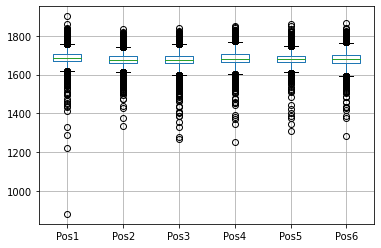

In [13]:
import matplotlib.pyplot as plt
axis = boards_no_time.boxplot()
plt.show()

The plot has been created but it doesn't look great. Let's play with some of the plot setting.

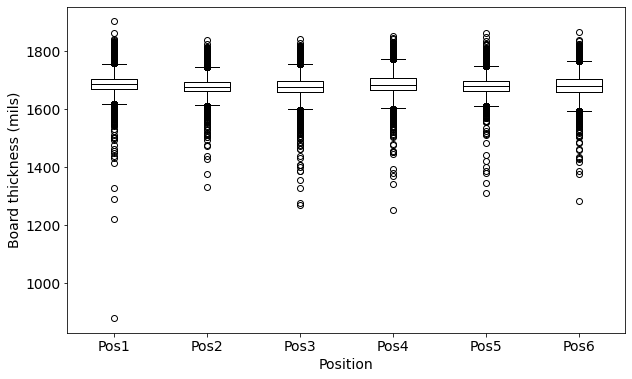

In [14]:
# Make the figure larger, make the font larger, remove the grid lines
# change the box plot colours to all black
axis = boards_no_time.boxplot(figsize=(10,6),fontsize=14,grid=False,
                              boxprops=dict(color='k'),
                              medianprops=dict(color='k'),
                              whiskerprops=dict(color='k'))
axis.set_xlabel("Position", {'size': 14})
axis.set_ylabel("Board thickness (mils)", {'size': 14})
plt.show()

For some reason the above code doesn't always work. Another way of doing it can be found below.

[None, None, None, None, None, None, None, None, None, None, None, None]

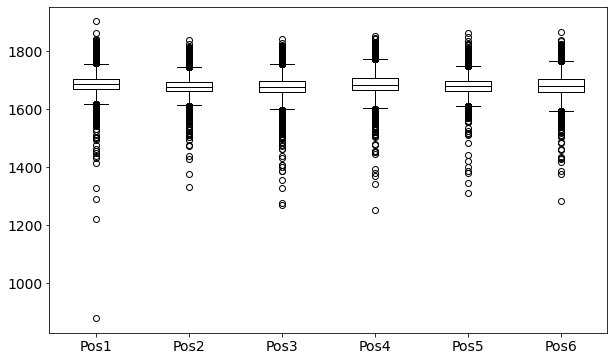

In [21]:
axis_lines = boards_no_time.boxplot(figsize=(10,6),fontsize=14,grid=False,
                              boxprops=dict(color='k'), return_type='both')
axis=axis_lines[0]
lines = axis_lines[1]
[item.set_color('k') for item in lines['medians']]
[item.set_color('k') for item in lines['boxes']]
[item.set_color('k') for item in lines['whiskers']]

If additional parts of the above plot need to be changed you can find the names of the plot parts in the lines dictionary in the variable explorer.

The same figure can be made directly using matplotlib.

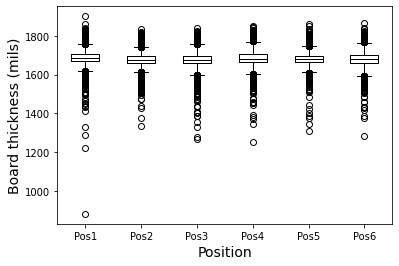

In [16]:
# Create the plot
fig, ax = plt.subplots()
ax.boxplot(boards_no_time, labels=boards_no_time.columns,
                           boxprops=dict(color='k'),
                           medianprops=dict(color='k'),
                           whiskerprops=dict(color='k'))
ax.set_xlabel("Position", {'size': 14})
ax.set_ylabel("Board thickness (mils)", {'size': 14})
# Change the font and figure size - changes for all subsequent figures
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('figure', figsize = [10,6]) 
plt.show()

Let's use the dataframe to make a bar plot of the averages of each of the columns now. We'll come back more to the statistical functionalities of these libraries later in the course.

In [17]:
# Calucalte the mean for all columns
mean = boards_no_time.mean()
print(mean)

Pos1    1689.3934
Pos2    1680.9126
Pos3    1678.2108
Pos4    1687.3510
Pos5    1682.8952
Pos6    1681.5778
dtype: float64


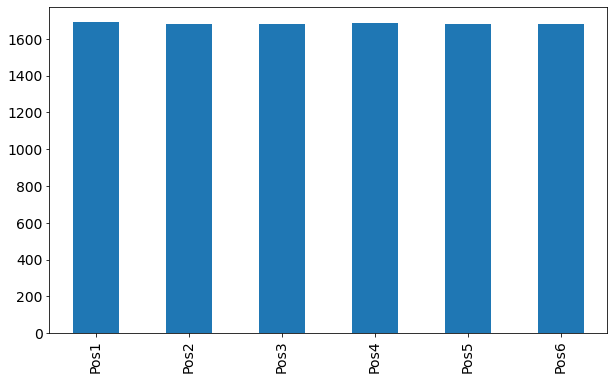

In [18]:
# Create the bar plot
ax = mean.plot.bar()
plt.show()

Plots can also be created using chained commands.

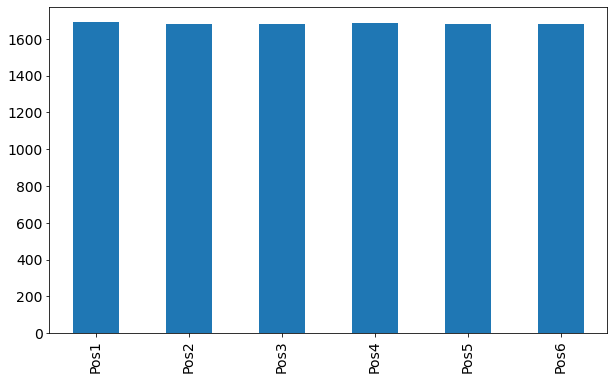

In [19]:
ax = boards_no_time.mean().plot.bar()
plt.show()

Lastly the axis option can be used in many scenarios to change which axis in the dataframe is being operated on. Usually the default axis=0, meaning that the method will operate on the rows (in the bar plot above, the average is computed by summing up the rows for each column). By specifying axis=1 the columns will be the axis of operation (the average is computed by summing up the columns for all rows). We'll show an example using a line plot. The line plot will have 5000 values on the x-axis (one for each row in the dataframe).

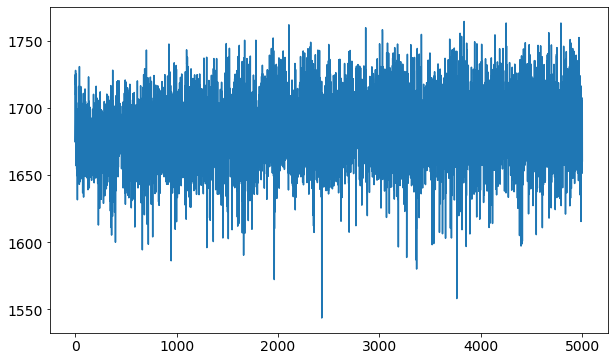

In [20]:
ax = boards_no_time.mean(axis=1).plot()
plt.show()

We will not cover an example of every plot. The general syntax for the different plots is similar. Please check the documentation of the specific plot you want to make to learn about the different plot options. Additionally, these libraries are so widely used that you can typically find the answer to your questions by googling them.